In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [141]:
df = pd.read_csv('/home/srinivas/Downloads/datasets/csv datasets/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [143]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [144]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [145]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [146]:
df1 = df.drop(['area_type','availability','society','balcony'],axis = 'columns')

In [147]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [148]:
#check for null values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [149]:
df1.dropna(inplace = True)

In [150]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [151]:
df1['bhk'] = df1['size'].apply(lambda x : int(x.split(' ')[0]))

In [152]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [153]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [154]:
df1[df1['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [155]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [156]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [157]:
df1[~df1['total_sqft'].apply(lambda x: is_float(x))].value_counts()

location                                      size       total_sqft         bath  price    bhk
Whitefield                                    4 BHK      2830 - 2882        5.0   154.500  4      2
 Rachenahalli                                 1 RK       385 - 440          1.0   19.800   1      1
Pragathi Nagar                                1 BHK      799 - 803          1.0   33.645   1      1
Rajaji Nagar                                  4 BHK      2563 - 2733        5.0   251.500  4      1
Rajapura                                      2 BHK      86.72Sq. Meter     2.0   40.000   2      1
Ramamurthy Nagar                              1 Bedroom  1Grounds           1.0   48.000   1      1
Sarjapur                                      1 BHK      633 - 666          1.0   17.535   1      1
                                              2 BHK      1145 - 1340        2.0   43.490   2      1
                                              3 Bedroom  1574Sq. Yards      3.0   76.000   3      1
     

In [158]:
df1.duplicated().value_counts()

False    12365
True       881
dtype: int64

In [159]:
def change(x):
    data = x.split('-')
    if(len(data)==2):
        return((float(data[0])+float(data[1]))//2)
    try:
        return float(x)
    except:
        return None

In [160]:
change('777')

777.0

In [161]:
#now data cleaning on the data.
df2 = df1.copy()
df2['total_sqft'] =df1['total_sqft'].apply(lambda x : change(x))

In [162]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [163]:
df3 = df2.copy()
df3['price_per_sq'] = df3['price']*100000/df3['total_sqft']

In [164]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [165]:
pd.options.display.max_rows = 999
locations = df3['location'].value_counts()

In [166]:
filt = locations.values<10
less_ten = locations[filt]

In [196]:
df4 = df3.copy()
df4['location'] = df4['location'].apply(lambda x : 'other' if x in less_ten else x)

In [197]:
df4['location'] = df4['location'].apply(lambda x : x.strip())
df4['location'].nunique()

254

In [198]:
df3['location'].nunique()

1304

In [199]:
#the locations that are less than 10 count are changed to other

In [201]:
df4.location.value_counts()

other                          2776
Whitefield                      534
Sarjapur  Road                  392
Electronic City                 302
Kanakpura Road                  266
Thanisandra                     233
Yelahanka                       210
Uttarahalli                     186
Hebbal                          176
Marathahalli                    175
Raja Rajeshwari Nagar           171
Bannerghatta Road               152
Hennur Road                     150
7th Phase JP Nagar              149
Haralur Road                    141
Electronic City Phase II        131
Rajaji Nagar                    106
Chandapura                       98
Bellandur                        96
KR Puram                         88
Hoodi                            88
Electronics City Phase 1         87
Yeshwanthpur                     85
Begur Road                       84
Sarjapur                         81
Harlur                           79
Kasavanhalli                     79
Hormavu                     

In [172]:
#outlier detection and removal

In [202]:
df4 = df4[~(df4['total_sqft']/df3['bhk']<300)]

In [203]:
df4.shape[0]

12502

In [204]:
data = df4.groupby('location')

In [205]:
data.get_group('Anekal')

,location,size,total_sqft,bath,price,bhk,price_per_sq
382,Anekal,2 Bedroom,1200.0,1.0,36.0,2,3000.000000
744,Anekal,2 BHK,656.0,2.0,22.0,2,3353.658537
1421,Anekal,2 BHK,620.0,2.0,22.0,2,3548.387097
1732,Anekal,1 BHK,600.0,1.0,16.5,1,2750.000000
1869,Anekal,2 BHK,925.0,2.0,40.0,2,4324.324324
1997,Anekal,1 BHK,530.0,1.0,18.0,1,3396.226415
2186,Anekal,3 Bedroom,1800.0,3.0,68.0,3,3777.777778
2416,Anekal,2 Bedroom,1200.0,1.0,36.0,2,3000.000000
2642,Anekal,2 BHK,1035.0,2.0,38.3,2,3700.483092
3679,Anekal,2 BHK,888.0,2.0,34.0,2,3828.828829


In [206]:
def outlier_removal(dframe):
    out_df = pd.DataFrame()
    for key,subdf in dframe.groupby('location'):
        mean = subdf['price_per_sq'].mean()
        std = subdf['price_per_sq'].std()
        outdf = subdf[(subdf['price_per_sq']>(mean-std)) & (subdf['price_per_sq']<=(mean+std))]
        out_df = pd.concat([outdf,out_df],ignore_index = True)
    return out_df

In [207]:
df5 = outlier_removal(df4)
df5.shape

(10280, 7)

In [209]:
df4['location'].nunique()

254

In [210]:
def plott(df,location):
    df1 = df[(df['location']==location) & (df['bhk']==2)]
    df2 = df[(df['location']==location)& (df['bhk']==3)]
    pyp.scatter(df1['total_sqft'],df1['price'],marker = '+')
    pyp.scatter(df2['total_sqft'],df2['price'])
    pyp.show()

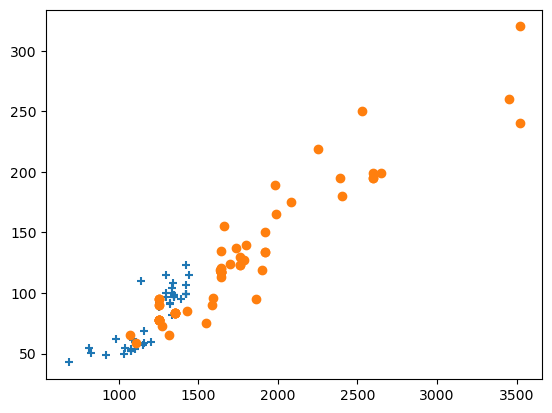

In [211]:
plott(df5,'Hebbal')

In [212]:
df5.location

0                      other
1                      other
2                      other
3                      other
4                      other
                ...         
10275    1st Block Jayanagar
10276    1st Block Jayanagar
10277    1st Block Jayanagar
10278    1st Block Jayanagar
10279    1st Block Jayanagar
Name: location, Length: 10280, dtype: object

In [213]:
df4.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sq'],
      dtype='object')

### we are going to remove the rows for the same area ,where 3 bed rooms costs is less than 2 bed rooms cost.simply removing the 3 bed room apartments for the same area where price is less than the mean of the 2 bed room apartment

In [214]:
data = df4.groupby('location')

In [215]:
def remove_outliers(df):
    remove_index = np.array([])
    for ind,ind_df in df.groupby('location'):
        dic = {}
        for bhk,bhk_df in ind_df.groupby('bhk'):
            dic[bhk]={
                'mean':np.mean(bhk_df.price_per_sq),
                'std':np.std(bhk_df.price_per_sq),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in ind_df.groupby('bhk'):
            stats = dic.get(bhk-1)
            if stats and stats['count']>5:
                remove_index = np.append(remove_index,bhk_df[bhk_df['price_per_sq']<stats['mean']].index.values)
    return df.drop(remove_index,axis='rows')

In [216]:
df6 = remove_outliers(df5)

In [217]:
df6.shape

(7430, 7)

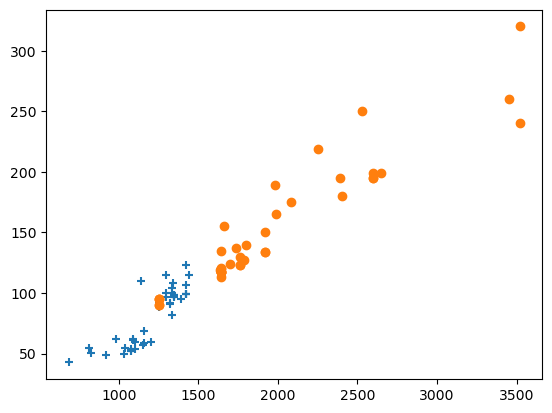

In [218]:
plott(df6,'Hebbal')

### we can observe that the outliers are removed

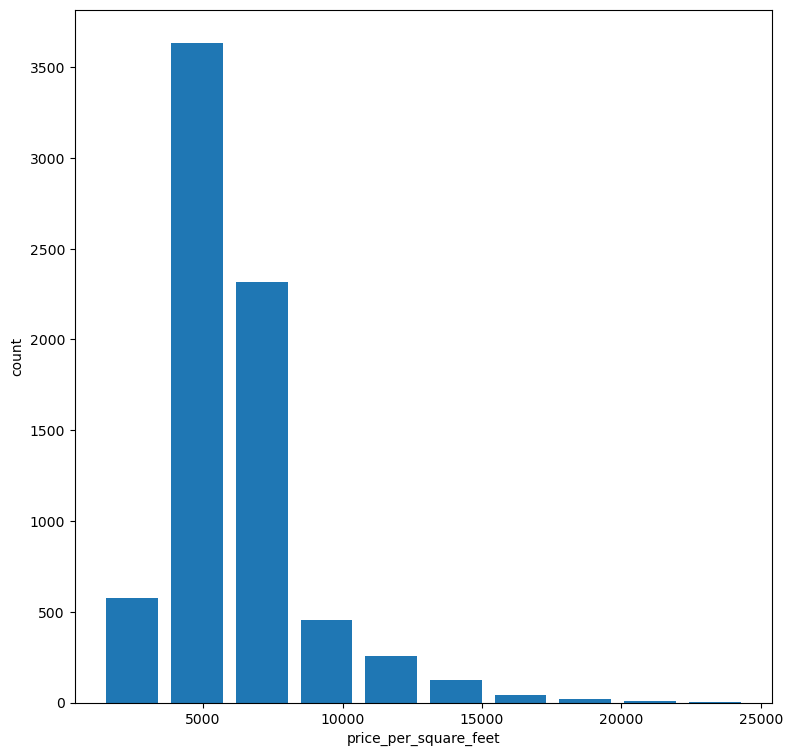

In [219]:
f,ax = pyp.subplots(figsize= (9,9))
ax.hist(df6.price_per_sq,rwidth=0.8)
ax.set_xlabel('price_per_square_feet')
ax.set_ylabel('count')
pyp.show()

In [220]:
df6.bath.unique()

array([ 4.,  1.,  2.,  3.,  8.,  9.,  5.,  6., 12., 16.,  7., 13., 14.])

In [221]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sq
533,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
619,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
1323,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
1639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
4907,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9690,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152


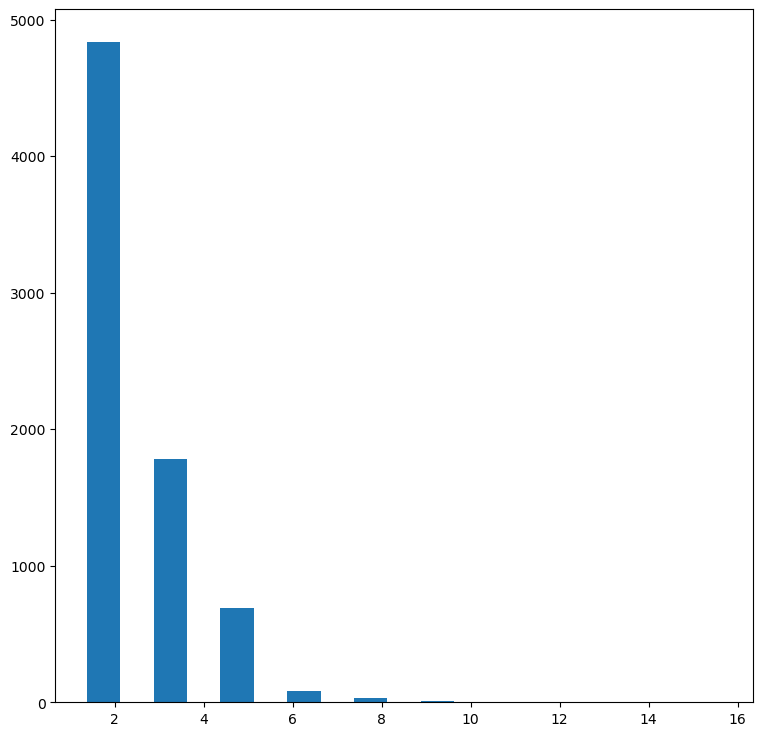

In [225]:
f,ax = pyp.subplots(figsize=(9,9))
ax.hist(df6['bath'],rwidth=0.5)
pyp.show()

### most apratments have 2 bathrooms

In [227]:
df7 = df6[df6['bath']<=df6['bhk']+2]

In [228]:
df7.shape

(7425, 7)

### now the dataset is preprcessed and cleaned.

## now the task is to remve the unwanted features and building a model

In [229]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sq
0,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
2,other,1 RK,510.0,1.0,25.25,1,4950.980392
6,other,2 BHK,1500.0,2.0,185.00,2,12333.333333
7,other,2 BHK,840.0,2.0,45.00,2,5357.142857
8,other,3 Bedroom,4395.0,3.0,240.00,3,5460.750853


In [252]:
df8 = df7.drop(['size','price_per_sq'],axis='columns')

In [253]:
df8.head()

,location,total_sqft,bath,price,bhk
0,other,2770.0,4.0,290.00,3
2,other,510.0,1.0,25.25,1
6,other,1500.0,2.0,185.00,2
7,other,840.0,2.0,45.00,2
8,other,4395.0,3.0,240.00,3


### now changing categorical values of the location (applying one hot encoding)

In [254]:
dummies = pd.get_dummies(df7['location'])
#since i dont want other locations to be defined while deploying
df8 = pd.concat([df8,dummies],axis='columns')

In [255]:
df8.drop('other',axis='columns',inplace=True)

In [256]:
df8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,other,2770.0,4.0,290.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,other,510.0,1.0,25.25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,other,1500.0,2.0,185.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,other,840.0,2.0,45.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,other,4395.0,3.0,240.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
x = df8.drop(['price','location'],axis='columns')
y = df8['price']

In [258]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,510.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1500.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,840.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4395.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=4)

In [262]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8223541782872668

In [264]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y)

array([ 7.29154881e-01,  5.31518975e-01,  5.81995184e-01, -1.50850457e+15,
       -2.85331579e+16])

In [265]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=4)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82235418, 0.82601456, 0.84809415, 0.86283934, 0.8740958 ])

### if we see that the score is good for the linear regression model we also have to check remaining models on how are they performed

### also we need to check the remaining techniques

In [307]:
def algo(x,y):
    score=[]
    dic ={
        'linearregression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        }
    }
    cv = ShuffleSplit(n_splits=5,test_size=5,random_state=4)
    for name,models in dic.items():
        model = RandomizedSearchCV(models['model'],models['params'],cv=cv,return_train_score=False,n_iter=2)
        model.fit(x,y)
        score.append({
            'model':name,
            'score':model.best_score_,
            'params':model.best_params_
        })
    return pd.DataFrame(score)
model = algo(x,y)

In [308]:
model

,model,score,params
0,linearregression,0.860004,{'fit_intercept': True}
1,lasso,0.638877,"{'selection': 'random', 'alpha': 1}"


### from this we can understand that linear regression fits better for above dataset

### so its time to create a pickle file for the given dataset .we can use either pickle module or we can import joblib from sklean

In [328]:
def predict_vals(sqft,bath,bhk,location):
    loc = np.where(x.columns==location)[0][0]
    a=np.zeros(len(x.columns))
    a[0]=sqft
    a[1]=bath
    a[2]=bhk
    if loc>=0:
        a[loc]=1
    return lr.predict([a])

In [332]:
predict_vals(1000,2,2,'1st Phase JP Nagar')[0]

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.89468277525852

In [333]:
predict_vals(1000,2,3,'1st Phase JP Nagar')[0]

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.86024562613999

In [334]:
predict_vals(1000,2,2,'Indira Nagar')[0]

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


187.85636257528432

In [335]:
import pickle

In [336]:
with open('bengaluru_dataset.pickle','wb') as f:
    pickle.dump(lr,f)

In [342]:
with open('bengaluru_dataset.pickle','rb') as f:
    model = pickle.load(f)

In [343]:
def predict_vals(sqft,bath,bhk,location):
    loc = np.where(x.columns==location)[0][0]
    a=np.zeros(len(x.columns))
    a[0]=sqft
    a[1]=bath
    a[2]=bhk
    if loc>=0:
        a[loc]=1
    return model.predict([a])

In [344]:
predict_vals(1000,2,2,'Indira Nagar')

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([187.85636258])

In [345]:
import json
columns={
    'column':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(co))